#### Training a network for audio classification - Using Urban8K dataset
Written by : leopauly | cnlp@leeds.ac.uk

In [1]:
import wave
import pandas as pd
import numpy as np
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import pylab
import pickle

In [2]:
window_size = 512

# Dataset parameters
work_dir = "/nobackup/leopauly/UrbanSound8K/audio"
classes={
'0':'air_conditioner',
'1':'car_horn',
'2':'children_playing',
'3':'dog_bark',
'4':'drilling',
'5':'engine_idling',
'6':'gun_shot',
'7':'jackhammer',
'8':'siren',
'9':'street_music'
}

In [3]:
def windows(data, n_frames):  # Overlap of 50%
    ws = window_size * (n_frames - 1)
    start = 0
    while start < len(data):
        yield start, start + ws, ws
        start += (ws / 2)

In [ ]:
def extract_features():
    Y = []
    X=[]
    cnt = 0
    
    for sub_dir in os.listdir(work_dir):
        print("Working on dir: ", sub_dir)
        if (sub_dir=='.DS_Store') : break# continue
        
        for fs in os.listdir(work_dir + "/" + sub_dir):
            if ".wav" not in fs: continue
            print('fs',fs)
            
            try:
    
                wav = wave.open(work_dir + "/" + sub_dir + "/" +fs, 'r')
                frames = wav.readframes(-1)
                sound_info = pylab.fromstring(frames, 'Int16')
                frame_rate = wav.getframerate()
                wav.close()


                label = fs.split('-')[1]
                print(cnt, ":Loading file: ", fs, " class: ", classes[str(label)])
                cnt += 1


                (Pxx, freqs, bins, im)=pylab.specgram(sound_info, NFFT=512, Fs=frame_rate)
                print(Pxx.shape)
                Pxx=np.log(Pxx)
                #pylab.show(Pxx)
                plt.imshow(Pxx)
                plt.show()

                Y.append(label)
                X.append(Pxx)
           
            except Exception:
                pass
            
    return X,Y
            
            


Working on dir:  fold10
fs 196084-2-0-2.wav
0 :Loading file:  196084-2-0-2.wav  class:  children_playing
(257, 918)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


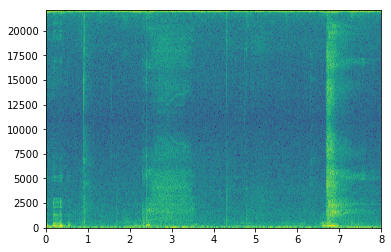

fs 117889-9-0-12.wav
1 :Loading file:  117889-9-0-12.wav  class:  street_music
(257, 918)


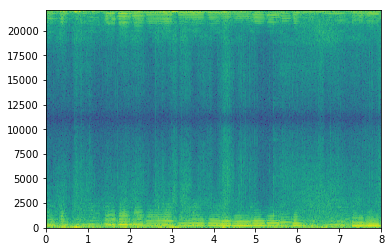

fs 188813-7-10-3.wav
fs 72220-3-2-4.wav
2 :Loading file:  72220-3-2-4.wav  class:  dog_bark
(257, 918)


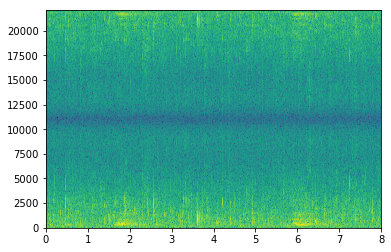

fs 207213-2-0-109.wav
fs 28808-1-0-10.wav
3 :Loading file:  28808-1-0-10.wav  class:  car_horn
(257, 918)


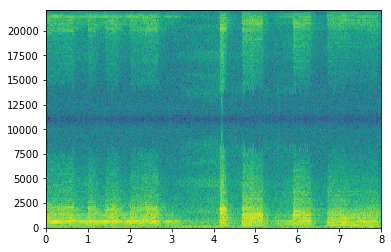

fs 27070-2-0-5.wav
4 :Loading file:  27070-2-0-5.wav  class:  children_playing
(257, 918)


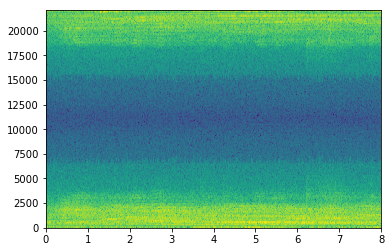

fs 155262-2-0-58.wav
fs 187863-4-0-4.wav
5 :Loading file:  187863-4-0-4.wav  class:  drilling
(257, 166)


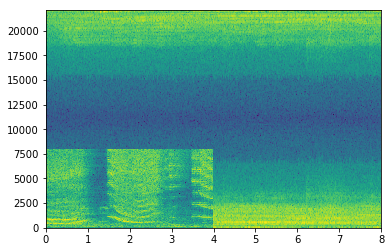

fs 189985-0-0-1.wav
6 :Loading file:  189985-0-0-1.wav  class:  air_conditioner
(257, 918)


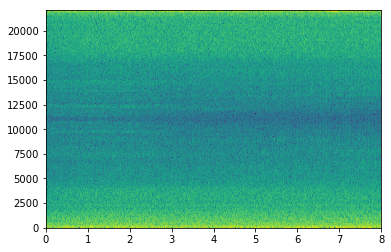

fs 28808-1-0-6.wav
7 :Loading file:  28808-1-0-6.wav  class:  car_horn
(257, 918)


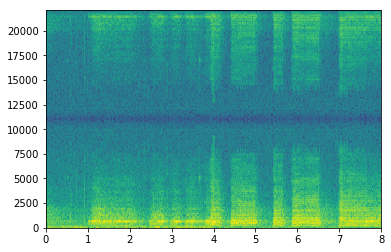

fs 74364-8-1-23.wav
8 :Loading file:  74364-8-1-23.wav  class:  siren
(257, 918)


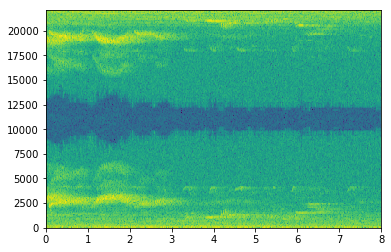

fs 83191-9-0-11.wav
9 :Loading file:  83191-9-0-11.wav  class:  street_music
(257, 499)


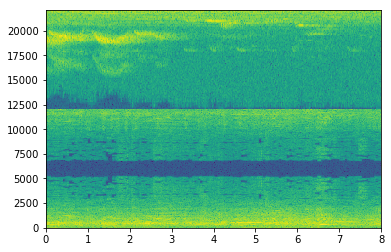

fs 26255-3-8-0.wav
10 :Loading file:  26255-3-8-0.wav  class:  dog_bark
(257, 134)


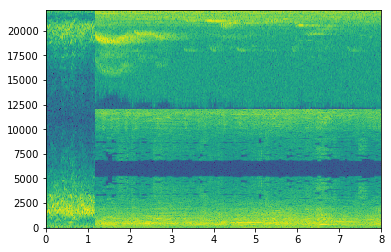

fs 99192-4-0-15.wav
11 :Loading file:  99192-4-0-15.wav  class:  drilling
(257, 459)


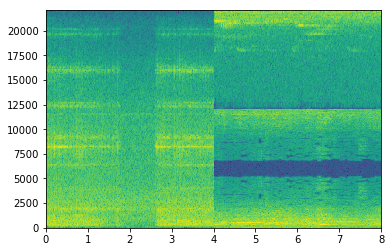

fs 83195-9-0-3.wav
12 :Loading file:  83195-9-0-3.wav  class:  street_music
(257, 499)


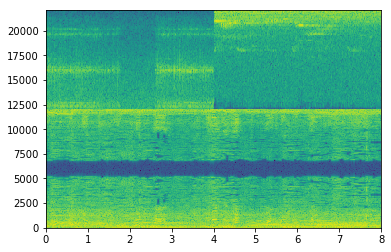

fs 14468-3-0-2.wav
13 :Loading file:  14468-3-0-2.wav  class:  dog_bark
(257, 918)


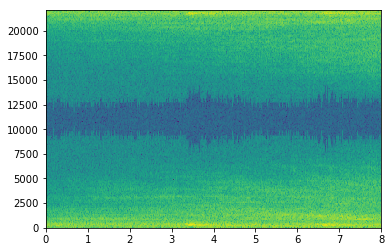

fs 74364-8-1-11.wav
14 :Loading file:  74364-8-1-11.wav  class:  siren
(257, 918)


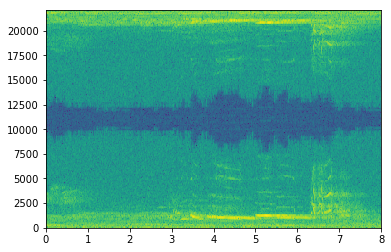

fs 7913-3-2-0.wav
15 :Loading file:  7913-3-2-0.wav  class:  dog_bark
(257, 180)


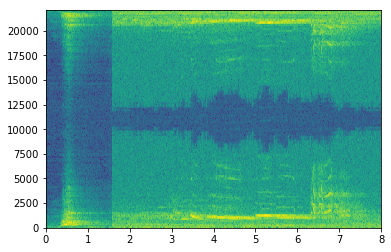

fs 189982-0-0-18.wav
16 :Loading file:  189982-0-0-18.wav  class:  air_conditioner
(257, 918)


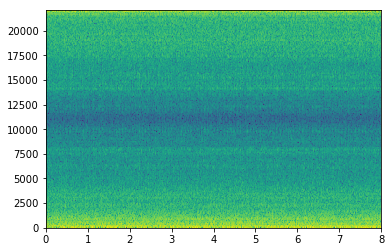

fs 181624-4-8-0.wav
fs 181624-4-6-0.wav
fs 99192-4-0-20.wav
17 :Loading file:  99192-4-0-20.wav  class:  drilling
(257, 459)


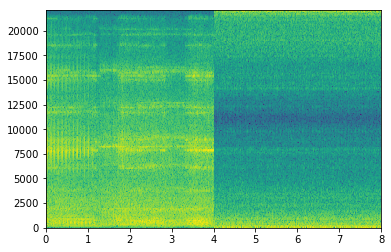

fs 155262-2-0-101.wav
fs 187863-4-0-1.wav
18 :Loading file:  187863-4-0-1.wav  class:  drilling
(257, 166)


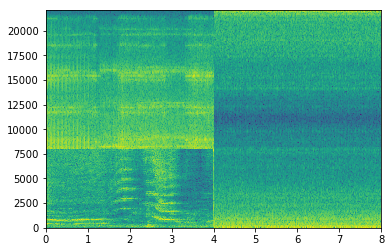

fs 103438-5-0-0.wav
19 :Loading file:  103438-5-0-0.wav  class:  engine_idling
(257, 918)


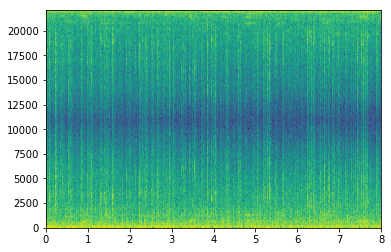

fs 15544-5-0-16.wav
fs 118278-4-0-7.wav
20 :Loading file:  118278-4-0-7.wav  class:  drilling
(257, 999)


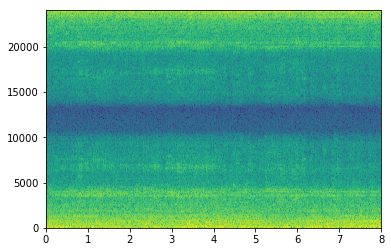

fs 162134-7-9-0.wav
fs 83502-0-0-4.wav
21 :Loading file:  83502-0-0-4.wav  class:  air_conditioner
(257, 918)


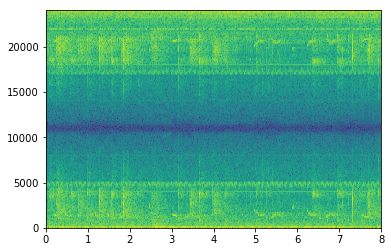

fs 162134-7-1-0.wav
fs 102857-5-0-13.wav
22 :Loading file:  102857-5-0-13.wav  class:  engine_idling
(257, 918)


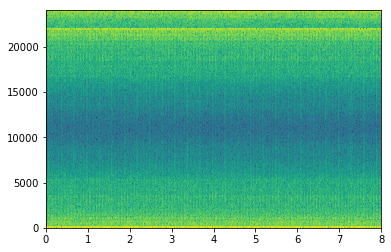

fs 189982-0-0-35.wav
23 :Loading file:  189982-0-0-35.wav  class:  air_conditioner
(257, 918)


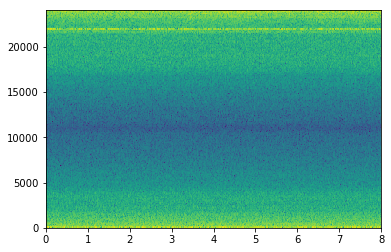

fs 162134-7-13-2.wav
fs 162134-7-11-0.wav
fs 167464-0-0-14.wav
fs 102857-5-0-19.wav
24 :Loading file:  102857-5-0-19.wav  class:  engine_idling
(257, 918)


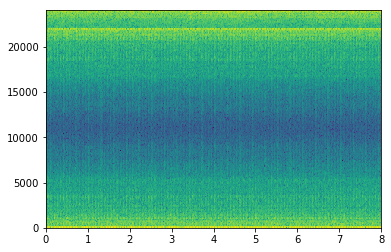

fs 188813-7-11-1.wav
fs 203424-9-0-34.wav
25 :Loading file:  203424-9-0-34.wav  class:  street_music
(257, 918)


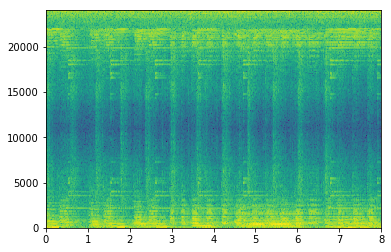

fs 128470-3-0-0.wav
fs 83191-9-0-17.wav
26 :Loading file:  83191-9-0-17.wav  class:  street_music
(257, 499)


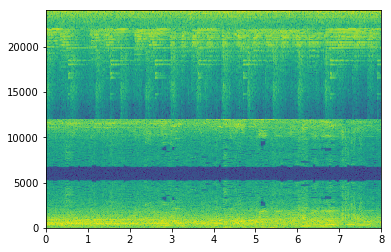

fs 99192-4-0-12.wav
27 :Loading file:  99192-4-0-12.wav  class:  drilling
(257, 459)


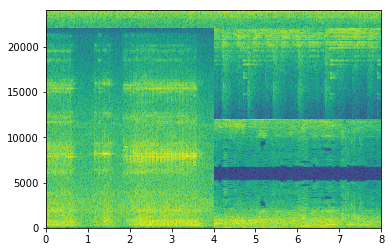

fs 188813-7-10-2.wav
fs 189982-0-0-16.wav
28 :Loading file:  189982-0-0-16.wav  class:  air_conditioner
(257, 918)


In [ ]:
features, labels  = extract_features()

In [ ]:
fd = open("/nobackup/leopauly/S2LStage2/data_x.pkl", 'wb')
pickle.dump(features, fd)
fd2 = open("/nobackup/leopauly/S2LStage2/data_y.pkl", 'wb')
pickle.dump(labels, fd2)

In [ ]:
check=444
plt.imshow(features[check])
print('Class:', classes[str(labels[check])])
plt.show()


In [ ]:
## Loading data
print("Start loading data")

fd_x= open("/nobackup/leopauly/S2LStage2/data_x.pkl", 'rb')
fd_y = open("/nobackup/leopauly/S2LStage2/data_y.pkl", 'rb')

features = pickle.load(fd_x)
labels = pickle.load(fd_y)

print("Data loaded")

In [ ]:
plt.imshow(features[check])
print('Class:', classes[str(labels[check])])
plt.show()